# Project 2
## COE379L: Software Design for Responsible Intelligent Systems
### Pranjal Adhikari, pa8729

## Part 1: Data Preprocessing

In [134]:
# import libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
# read data into variable bcdata
bcdata = pd.read_csv('https://raw.githubusercontent.com/joestubbs/coe379L-sp24/master/datasets/unit02/project2.data')

### Shape & Size

In [136]:
# shape of data set
bcdata.shape

(286, 10)

In [137]:
# size of data set
bcdata.size

2860

### Data Information & Conversion

In [138]:
# information about data in each column
bcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [139]:
# convert all columns but deg-malig to datatype category
for i in bcdata:
    if i != 'deg-malig':
        bcdata[i] = bcdata[i].astype('category')

bcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   class        286 non-null    category
 1   age          286 non-null    category
 2   menopause    286 non-null    category
 3   tumor-size   286 non-null    category
 4   inv-nodes    286 non-null    category
 5   node-caps    286 non-null    category
 6   deg-malig    286 non-null    int64   
 7   breast       286 non-null    category
 8   breast-quad  286 non-null    category
 9   irradiat     286 non-null    category
dtypes: category(9), int64(1)
memory usage: 6.7 KB


### Invalid Values & Missing Data

In [140]:
# print values within each column
print("Column:")
for i in bcdata:
    print(i, bcdata[i].unique())

Column:
class ['no-recurrence-events', 'recurrence-events']
Categories (2, object): ['no-recurrence-events', 'recurrence-events']
age ['30-39', '40-49', '60-69', '50-59', '70-79', '20-29']
Categories (6, object): ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
menopause ['premeno', 'ge40', 'lt40']
Categories (3, object): ['ge40', 'lt40', 'premeno']
tumor-size ['30-34', '20-24', '15-19', '0-4', '25-29', ..., '10-14', '40-44', '35-39', '5-9', '45-49']
Length: 11
Categories (11, object): ['0-4', '10-14', '15-19', '20-24', ..., '40-44', '45-49', '5-9', '50-54']
inv-nodes ['0-2', '6-8', '9-11', '3-5', '15-17', '12-14', '24-26']
Categories (7, object): ['0-2', '12-14', '15-17', '24-26', '3-5', '6-8', '9-11']
node-caps ['no', 'yes', '?']
Categories (3, object): ['?', 'no', 'yes']
deg-malig [3 2 1]
breast ['left', 'right']
Categories (2, object): ['left', 'right']
breast-quad ['left_low', 'right_up', 'left_up', 'right_low', 'central', '?']
Categories (6, object): ['?', 'central', 'left_

In [141]:
# determine rows with '?' values in node-caps column
bcdata[bcdata['node-caps'] == '?']

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
145,no-recurrence-events,40-49,premeno,25-29,0-2,?,2,left,right_low,yes
163,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_up,yes
164,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_low,yes
183,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_up,yes
184,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_low,yes
233,recurrence-events,70-79,ge40,15-19,9-11,?,1,left,left_low,yes
263,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_up,no
264,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_low,no


In [142]:
# determine rows with '?' values in breast-quad column
bcdata[bcdata['breast-quad'] == '?']

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
206,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,?,no


In [143]:
# replace '?' values in node-caps column to mode of node-caps
bcdata.replace({'node-caps': bcdata['node-caps'].mode()[0]}, inplace=True)

# replace '?' values in breast-quad column to mode of breast-quad
bcdata.replace({'breast-quad': bcdata['breast-quad'].mode()[0]}, inplace=True)

In [144]:
# total num of missing data in each column
bcdata.isnull().sum()

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

### Visualization

Text(0.5, 1.0, 'Count of Tumor Size Range')

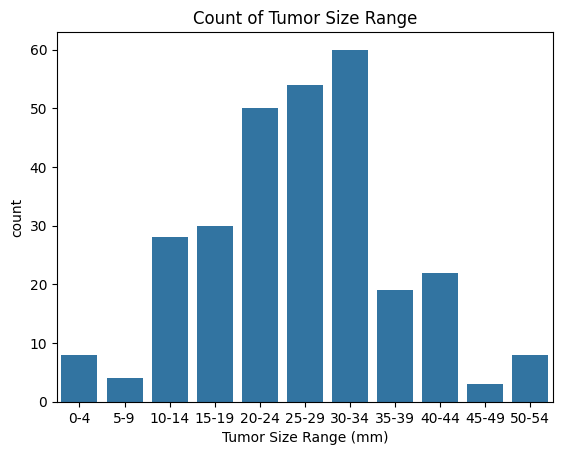

In [145]:
# tumor size range plot
xvals = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54']
sns.countplot(x=bcdata['tumor-size'], order=xvals)
plt.xlabel("Tumor Size Range (mm)")
plt.title("Count of Tumor Size Range")

Text(0.5, 1.0, 'Age Range of Breast Cancer Patients')

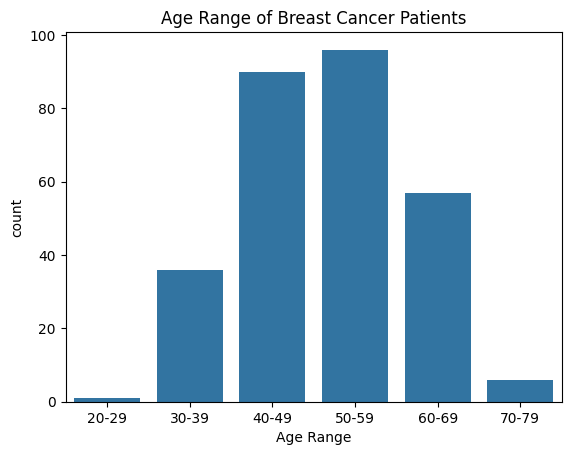

In [146]:
# age ranges of breast cancer patients
sns.countplot(x=bcdata['age'])
plt.xlabel("Age Range")
plt.title("Age Range of Breast Cancer Patients")

Text(0.5, 1.0, 'Location of Breast Cancer')

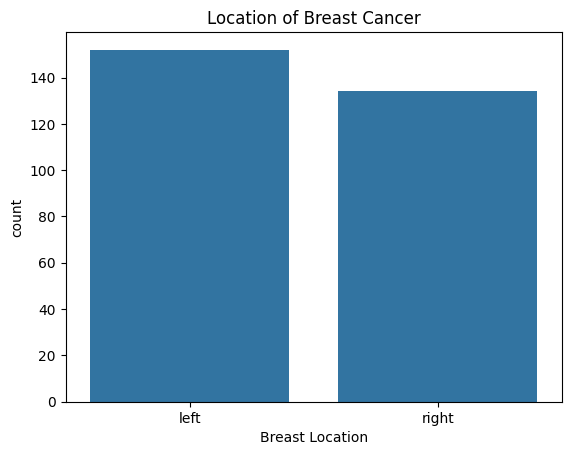

In [147]:
# breast cancer location
sns.countplot(x=bcdata['breast'])
plt.xlabel("Breast Location")
plt.title("Location of Breast Cancer")

### One-hot Encoding

In [148]:
# one-hot encoding on all columns except deg-malig
bcdata = pd.get_dummies(bcdata, columns=["class", "menopause", "age", "tumor-size", "inv-nodes", "node-caps", "breast", "breast-quad", "irradiat"], drop_first=True)

In [149]:
# new columns created
bcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   deg-malig                286 non-null    int64
 1   class_recurrence-events  286 non-null    bool 
 2   menopause_lt40           286 non-null    bool 
 3   menopause_premeno        286 non-null    bool 
 4   age_30-39                286 non-null    bool 
 5   age_40-49                286 non-null    bool 
 6   age_50-59                286 non-null    bool 
 7   age_60-69                286 non-null    bool 
 8   age_70-79                286 non-null    bool 
 9   tumor-size_10-14         286 non-null    bool 
 10  tumor-size_15-19         286 non-null    bool 
 11  tumor-size_20-24         286 non-null    bool 
 12  tumor-size_25-29         286 non-null    bool 
 13  tumor-size_30-34         286 non-null    bool 
 14  tumor-size_35-39         286 non-null    bool 
 15  tumor-

## Part 2: Assessing Models

In [150]:
# import libraries needed
from sklearn.model_selection import train_test_split
import numpy as np

### Preparation

In [151]:
# save all variables but class_recurrence-events as independent variables
X = bcdata.drop('class_recurrence-events', axis=1)

# save class_recurrence-events as dependent variable, target value
y = bcdata['class_recurrence-events']

### K-Nearest Neighbor Classifier & Results

In [152]:
# split into train & test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [153]:
from sklearn.neighbors import KNeighborsClassifier

# search for optimal hyperparameter
knn_search_accuracy = KNeighborsClassifier()

In [154]:
# dictionary of values to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 100)}

In [155]:
from sklearn.model_selection import GridSearchCV

# instantinate GridSearchCV to pass model and list of hyperparameters
knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, cv=5)

In [156]:
# fit kNN model for each hyperparameter
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [157]:
# check optimal n_neighbor value
knn_gscv.best_params_

{'n_neighbors': 10}

In [166]:
# import results libraries
from sklearn.metrics import classification_report

In [167]:
# results
best_knn = knn_gscv.best_estimator_

# print results for kNN test and train data sets
print(f"-kNN Test Data Peformance\n*******************\n{classification_report(y_test, best_knn.predict(X_test))}")
print(f"-kNN Train Data Peformance\n********************\n{classification_report(y_train, best_knn.predict(X_train))}")

-kNN Test Data Peformance
*******************
              precision    recall  f1-score   support

       False       0.74      0.97      0.84        60
        True       0.75      0.23      0.35        26

    accuracy                           0.74        86
   macro avg       0.75      0.60      0.60        86
weighted avg       0.75      0.74      0.69        86

-kNN Train Data Peformance
********************
              precision    recall  f1-score   support

       False       0.75      0.99      0.85       141
        True       0.87      0.22      0.35        59

    accuracy                           0.76       200
   macro avg       0.81      0.60      0.60       200
weighted avg       0.79      0.76      0.70       200



### Decision Tree & Results

In [160]:
# split into train & test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

[Text(0.693334829443447, 0.96875, 'x[25] <= 0.5\ngini = 0.416\nsamples = 200\nvalue = [141, 59]'),
 Text(0.5398713345302214, 0.90625, 'x[8] <= 0.5\ngini = 0.34\nsamples = 161\nvalue = [126, 35]'),
 Text(0.5207211250748055, 0.84375, 'x[21] <= 0.5\ngini = 0.375\nsamples = 140\nvalue = [105, 35]'),
 Text(0.40529622980251345, 0.78125, 'x[1] <= 0.5\ngini = 0.349\nsamples = 129\nvalue = [100, 29]'),
 Text(0.27019748653500897, 0.71875, 'x[0] <= 1.5\ngini = 0.337\nsamples = 126\nvalue = [99, 27]'),
 Text(0.05745062836624776, 0.65625, 'x[2] <= 0.5\ngini = 0.198\nsamples = 36\nvalue = [32, 4]'),
 Text(0.038300418910831836, 0.59375, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.07660083782166367, 0.59375, 'x[28] <= 0.5\ngini = 0.346\nsamples = 18\nvalue = [14, 4]'),
 Text(0.038300418910831836, 0.53125, 'x[5] <= 0.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.019150209455415918, 0.46875, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.05745062836624776, 0.46875, 'gini = 0.5\n

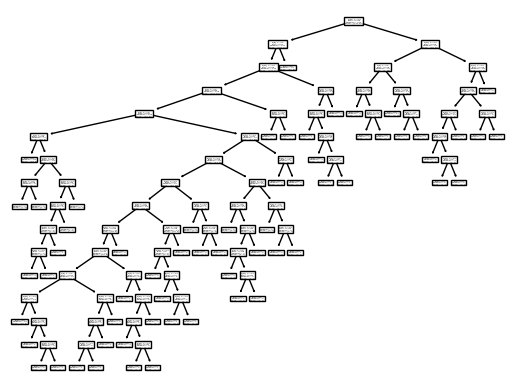

In [161]:
from sklearn.tree import DecisionTreeClassifier

# decision tree model
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)

# visual tree
from sklearn import tree
tree.plot_tree(model)

In [162]:
# print results for Decision Tree Classifier test and train data sets
print(f"-Decision Tree Test Data Peformance\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"-Decision Tree Train Data Peformance\n********************\n{classification_report(y_train, model.predict(X_train))}")

-Decision Tree Test Data Peformance
*******************
              precision    recall  f1-score   support

       False       0.71      0.75      0.73        60
        True       0.35      0.31      0.33        26

    accuracy                           0.62        86
   macro avg       0.53      0.53      0.53        86
weighted avg       0.60      0.62      0.61        86

-Decision Tree Train Data Peformance
********************
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       141
        True       1.00      0.90      0.95        59

    accuracy                           0.97       200
   macro avg       0.98      0.95      0.96       200
weighted avg       0.97      0.97      0.97       200



### Logistic Regression & Results

In [163]:
# split into train & test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [164]:
from sklearn.linear_model import LogisticRegression

# logistic regression model fit
model_lr = LogisticRegression(random_state=1, max_iter=1000).fit(X_train, y_train)

In [165]:
# print results for Logistic Regression test and train data sets
print(f"-Logistic Regression Test Data Peformance\n*******************\n{classification_report(y_test, model_lr.predict(X_test))}")
print(f"-Logistic Regression Train Data Peformance\n********************\n{classification_report(y_train, model_lr.predict(X_train))}")

-Logistic Regression Test Data Peformance
*******************
              precision    recall  f1-score   support

       False       0.75      0.90      0.82        60
        True       0.57      0.31      0.40        26

    accuracy                           0.72        86
   macro avg       0.66      0.60      0.61        86
weighted avg       0.70      0.72      0.69        86

-Logistic Regression Train Data Peformance
********************
              precision    recall  f1-score   support

       False       0.78      0.91      0.84       141
        True       0.63      0.37      0.47        59

    accuracy                           0.75       200
   macro avg       0.70      0.64      0.65       200
weighted avg       0.73      0.75      0.73       200

